**# SETUP**

In [1]:
import logging

# Set up logging configuration
logging.basicConfig(filename='debug.log', level=logging.DEBUG)

# IMPORTING LIBRARIES
logging.info("Importing libraries...")

# General Libraries
logging.debug("Importing os")
import os
logging.debug("Importing numpy")
import numpy as np
logging.debug("Importing pandas")
import pandas as pd
logging.debug("Importing seaborn")
import seaborn as sns
logging.debug("Importing scipy.stats")
from scipy.stats import norm
logging.debug("Importing collections.Counter")
from collections import Counter
logging.debug("Importing matplotlib.pyplot")
import matplotlib.pyplot as plt
logging.debug("Importing joblib")
from joblib import dump, load

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries
logging.debug("Importing sklearn.pipeline")
from sklearn.pipeline import make_pipeline
logging.debug("Importing sklearn.model_selection")
from sklearn.model_selection import train_test_split
logging.debug("Importing sklearn.model_selection.StratifiedShuffleSplit")
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries
logging.debug("Importing sklearn")
import sklearn
logging.debug("Importing xgboost")
import xgboost as xgb
logging.debug("Importing sklearn.tree")
from sklearn import tree
logging.debug("Importing sklearn.svm")
from sklearn.svm import SVC
logging.debug("Importing sklearn.metrics.roc_curve")
from sklearn.metrics import roc_curve
logging.debug("Importing imblearn.pipeline.Pipeline")
from imblearn.pipeline import Pipeline
logging.debug("Importing catboost.CatBoostClassifier")
from catboost import CatBoostClassifier
logging.debug("Importing imblearn.over_sampling.SMOTE")
from imblearn.over_sampling import SMOTE
logging.debug("Importing sklearn.ensemble.StackingClassifier")
from sklearn.ensemble import StackingClassifier
logging.debug("Importing sklearn.metrics.classification_report")
from sklearn.metrics import classification_report
logging.debug("Importing mlxtend.classifier.StackingCVClassifier")
from mlxtend.classifier import StackingCVClassifier
logging.debug("Importing sklearn.ensemble.RandomForestClassifier")
from sklearn.ensemble import RandomForestClassifier
logging.debug("Importing sklearn.linear_model.LogisticRegression")
from sklearn.linear_model import LogisticRegression
logging.debug("Importing sklearn.model_selection.cross_val_predict")
from sklearn.model_selection import cross_val_predict
logging.debug("Importing sklearn.model_selection.RandomizedSearchCV")
from sklearn.model_selection import RandomizedSearchCV
logging.debug("Importing sklearn.model_selection.KFold")
from sklearn.model_selection import KFold, cross_validate
logging.debug("Importing sklearn.metrics.recall_score")
from sklearn.metrics import recall_score, f1_score, roc_auc_score
logging.debug("Importing imblearn.pipeline.make_pipeline")
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
logging.debug("Importing sklearn.metrics.precision_recall_curve")
from sklearn.metrics import precision_recall_curve, average_precision_score
logging.debug("Importing sklearn.model_selection.RepeatedStratifiedKFold")
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
logging.debug("Importing sklearn.metrics.confusion_matrix")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score




***Data Load***

In [7]:
logging.debug('Start reading the file...')
bank_data = pd.read_csv('my_folder_\Data\data.csv')
logging.debug('File has been loaded successfully.')

logging.info('Printing the head of the file...')
print(bank_data.head())
logging.info('Head of the file has been printed.')

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

***DATA EXPLORATION***

In [8]:
#Checking out the Dtypes and null content of every variable in the dataset


logging.info('Printing the information about the dataset...')
bank_data.info()
logging.info('Information about the dataset has been printed.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
# Computing the descriptive statistics of our numrerical features



logging.info('Computing the descriptive statistics of the numerical features...')
logging.info(bank_data.describe())
bank_data.describe()
logging.info('Descriptive statistics have been computed.')

# Print the descriptive statistics
print(bank_data.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          



Despite the fact that we already know that there are no missing values (here it's pretty easy considering that we have just 96 features) it is important to computationally check that this is true, to avoid errors and time wasted in the following steps of the project.


In [16]:
# Check for NaN values and log the columns with NaN values
logging.debug('Columns with NaN values:')
for col in bank_data.columns:
    if bank_data[col].isna().sum() > 0:
        logging.info(col)

#bank_data.isna().sum().max()
[print(col) for col in bank_data if bank_data[col].isna().sum() > 0]

[]

In [18]:
# The classes are heavily skewed we need to solve this issue later.

print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

logging.debug('Class distribution of the "Bankrupt?" column:')
class_distribution = bank_data['Bankrupt?'].value_counts()
logging.info(class_distribution)

logging.debug('Percentage of financially stable:')
percent_stable = round(class_distribution[0] / len(bank_data) * 100, 2)
logging.info(f'Financially stable: {percent_stable}% of the dataset')

logging.debug('Percentage of financially unstable:')
percent_unstable = round(class_distribution[1] / len(bank_data) * 100, 2)
logging.info(f'Financially unstable: {percent_unstable}% of the dataset')

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


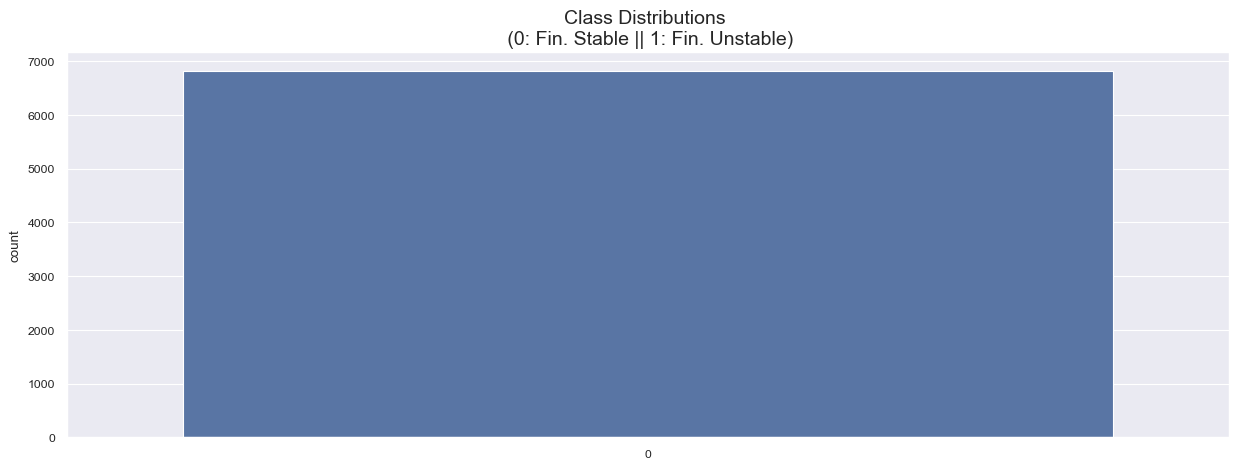

In [19]:
# Checking labels distributions

sns.set_theme(context = 'paper')

plt.figure(figsize = (15,5))
sns.countplot(bank_data['Bankrupt?'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)', fontsize=14)
plt.show()

logging.debug('Class distribution plot is displayed.')

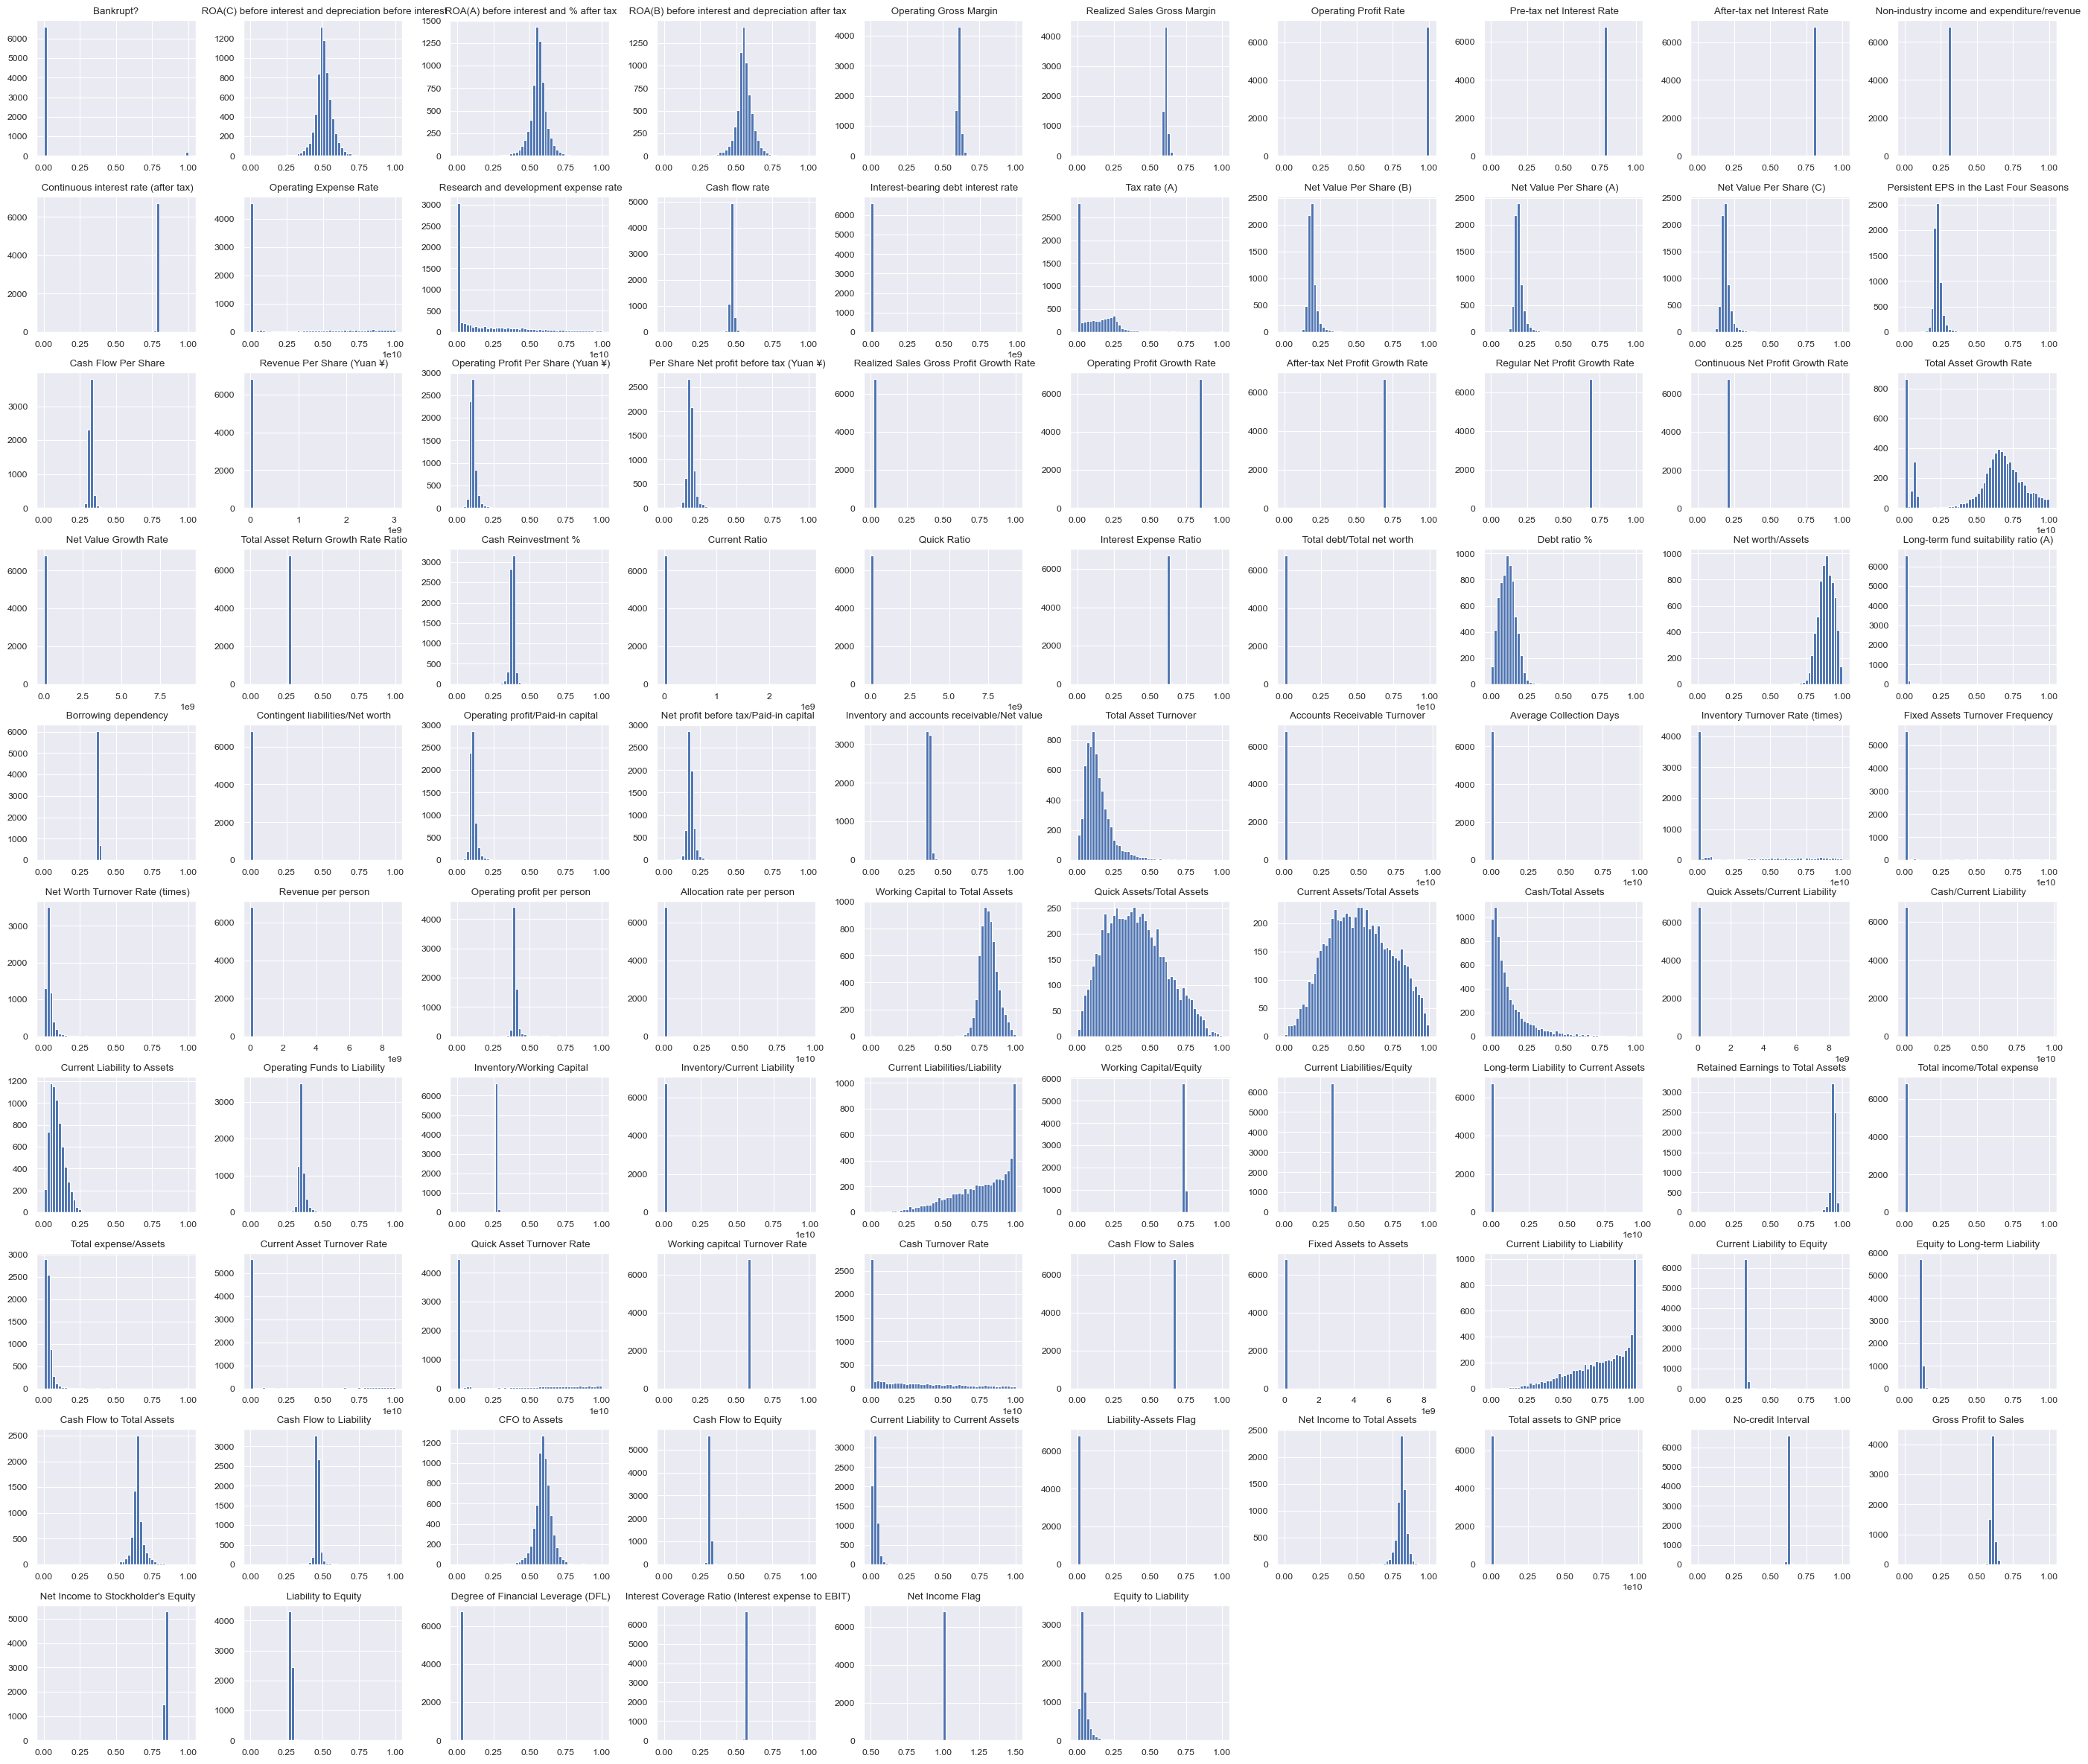

In [20]:
# Looking at the histograms of numerical data

bank_data.hist(figsize = (35,30), bins = 50)
plt.show()

logging.debug('Histograms of numerical data are displayed.')

In [ ]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = bank_data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()


In [ ]:
# Plotting the feature distributions for close to bankrputcy companies  
#REFACTORIZED

def plot_feature_distributions(bank_data, features, colors, titles):
    f, axes = plt.subplots(1, len(features), figsize=(24, 6))
    for i, feature in enumerate(features):
        data = bank_data[feature].loc[bank_data['Bankrupt?'] == 1].values
        sns.distplot(data, ax=axes[i], fit=norm, color=colors[i])
        axes[i].set_title(titles[i], fontsize=14)
    plt.show()

features1 = [' Net Income to Total Assets', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets']
colors1 = ['#FB8861', '#56F9BB', '#C5B3F9', '#C5B3F9']
titles1 = [' Net Income to Total Assets \n (Unstable companies)', 'total debt/tot net worth \n (Unstable companies)', 'debt_ratio \n (Unstable companies)', 'net worth/assets \n (Unstable companies)']
plot_feature_distributions(bank_data, features1, colors1, titles1)

features2 = [' Working Capital to Total Assets', ' Cash/Total Assets', ' Current Liability to Assets', ' Retained Earnings to Total Assets']
colors2 = ['#FB8861', '#56F9BB', '#C5B3F9', '#C5B3F9']
titles2 = ['working capitals to total assets \n (Unstable companies)', 'cash/total assets \n (Unstable companies)', 'liability to assets \n (Unstable companies)', 'retain earnings to total assets \n (Unstable companies)']
plot_feature_distributions(bank_data, features2, colors2, titles2)


***DATA TRANSFORMATION CUSTOM TRANSFORMERS***

In [ ]:
# Outliers removal

# Define a function to remove outliers from a feature in a dataset
def outliers_removal(feature, feature_name, dataset):
    # Calculate the interquartile range (IQR) of the feature
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25
    
    # Determine the upper and lower bounds for outliers
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    # Remove any data points that fall outside of these bounds
    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    
    return dataset

# Remove outliers from all features in the bank_data DataFrame
for col in bank_data:
    new_df = outliers_removal(bank_data[col], str(col), bank_data)


In [ ]:
#REFACTORIZED

#Plots after transformations


def plot_boxplots(new_df, features, titles):
    f, axes = plt.subplots(1, len(features), figsize=(24, 6))
    for i, feature in enumerate(features):
        sns.boxplot(x="Bankrupt?", y=feature, data=new_df, ax=axes[i])
        axes[i].set_title(titles[i], fontsize=14)
    plt.show()

features1 = [' Net Income to Total Assets', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets']
titles1 = ['Net Income to Total Assets \n Reduction of outliers', 'total debt/total net worth \n Reduction of outliers', 'debt ratio % \n Reduction of outliers', 'net worth/assets \n Reduction of outliers']
plot_boxplots(new_df, features1, titles1)

features2 = [' Working Capital to Total Assets', ' Cash/Total Assets', ' Current Liability to Assets', ' Retained Earnings to Total Assets']
titles2 = ['working capital to total assets \n Reduction of outliers', 'cash / total assets \n Reduction of outliers', 'current liability to assets \n Reduction of outliers', 'Retained Earnings to Total Assets \n Reduction of outliers']
plot_boxplots(new_df, features2, titles2)

In [ ]:
# Plotting the feature distributions for close to bankrputcy companies

#REFACTORIZED

def plot_feature_distributions(new_df, features, colors, titles):
    f, axes = plt.subplots(1, len(features), figsize=(24, 6))
    for i, feature in enumerate(features):
        data = new_df[feature].loc[new_df['Bankrupt?'] == 1].values
        sns.distplot(data, ax=axes[i], fit=norm, color=colors[i])
        axes[i].set_title(titles[i], fontsize=14)
    plt.show()

features = [' Net Income to Total Assets', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets']
colors = ['#FB8861', '#56F9BB', '#C5B3F9', '#C5B3F9']
titles = [' Net Income to Total Assets \n (Unstable companies)', 'total debt/tot net worth \n (Unstable companies)', 'debt_ratio \n (Unstable companies)', 'net worth/assets \n (Unstable companies)']
plot_feature_distributions(new_df, features, colors, titles)

In [ ]:
# Dividing Data and Labels

labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

***ADD CUSTOM TRANSFORMERS***

In [ ]:
#Normalize the data 

def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

In [ ]:
# Plotting Boxplots of the preprocessed numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data_norm, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [ ]:
data_norm.hist(figsize = (35,30),bins = 50)
plt.show()

In [ ]:
# Splitting Train and Test Data

X_raw,X_test,y_raw,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)

In [ ]:
#Saving the partition

X_test.to_csv('test_data.csv', index=False)

In [ ]:
# Stratified Cross Validation Splitting

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(X_raw,y_raw):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

LOGISTIC REGRESSION

***MODEL TRAINING***

In [ ]:
# List to append the score and then find the average

accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
#log_reg_params = {}
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])
    
    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('---' * 45)
print('')
print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))
print('')
print('---' * 45)

***SAVE MODEL***

In [ ]:
#Model saving

dump(best_est_reg, r'My_model/My_model_regression')

***LOAD MODEL***

In [ ]:
# Model loading from a local file

model = load(r'My_model/My_model_regression')

***PREDICT DATA***

In [ ]:
# Printing the classification report

label = ['Fin.Stable', 'Fin.Unstable']
pred_reg_sm = best_est_reg.predict(X_val_sm)
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

In [ ]:
# Plotting Precision-Recall curve

y_score_reg = best_est_reg.predict(X_val_sm)

average_precision = average_precision_score(y_val_sm, y_score_reg)

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_val_sm, y_score_reg)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=15)

plt.show()

In [ ]:
# Plotting confusion matrix for the classifier

conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

f, ax = plt.subplots(1, 1, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax)
ax.set_title('Logistic Regression', fontsize = 20)


In [ ]:
# Testing the linear regression with the test data

test_pred_lr = best_est_reg.predict(X_test)


In [ ]:
#Print the results from the test

print(classification_report(y_test, test_pred_lr, target_names=label))